# CLUSTERING ANALYSIS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors 
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as sch

# Data Preprocessing:

In [3]:
df=pd.read_csv('EastWestAirlines.csv')

In [4]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.shape

(3999, 12)

In [7]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
df.duplicated().sum()

0

<Axes: >

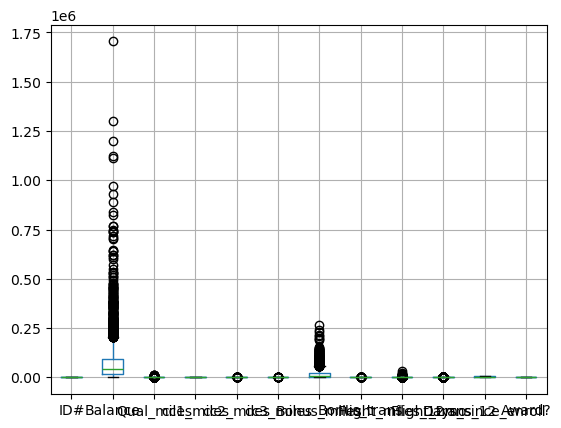

In [9]:
df.boxplot()

In [10]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

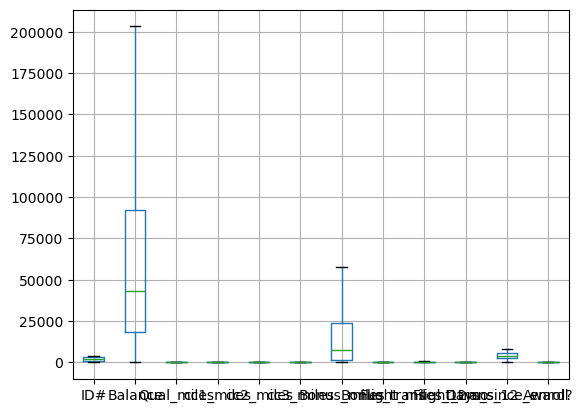

In [11]:
df.boxplot()
plt.show()

In [12]:
df=pd.DataFrame(df)
df.drop(columns=[ 'Qual_miles', 'cc2_miles', 'cc3_miles', 'Flight_miles_12mo', 'Flight_trans_12', 'Award?','ID#'],inplace=True)

In [13]:
df

Balance  cc1_miles  Bonus_miles  Bonus_trans  Days_since_enroll
0     28143.0          1        174.0          1.0               7000
1     19244.0          1        215.0          2.0               6968
2     41354.0          1       4123.0          4.0               7034
3     14776.0          1        500.0          1.0               6952
4     97752.0          4      43300.0         26.0               6935
...       ...        ...          ...          ...                ...
3994  18476.0          1       8525.0          4.0               1403
3995  64385.0          1        981.0          5.0               1395
3996  73597.0          3      25447.0          8.0               1402
3997  54899.0          1        500.0          1.0               1401
3998   3016.0          1          0.0          0.0               1398

[3999 rows x 5 columns]

In [14]:
std_sca = StandardScaler()
scaled= std_sca.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

In [15]:
df_scaled

Balance  cc1_miles  Bonus_miles  Bonus_trans  Days_since_enroll
0    -0.607258  -0.769578    -0.843091    -1.148854           1.395454
1    -0.758947  -0.769578    -0.840822    -1.039133           1.379957
2    -0.382070  -0.769578    -0.624581    -0.819689           1.411920
3    -0.835106  -0.769578    -0.825052    -1.148854           1.372208
4     0.579265   1.409471     1.543191     1.594189           1.363975
...        ...        ...          ...          ...                ...
3994 -0.772038  -0.769578    -0.381007    -0.819689          -1.315120
3995  0.010506  -0.769578    -0.798437    -0.709967          -1.318994
3996  0.167530   0.683121     0.555335    -0.380802          -1.315604
3997 -0.151188  -0.769578    -0.825052    -1.148854          -1.316088
3998 -1.035562  -0.769578    -0.852718    -1.258576          -1.317541

[3999 rows x 5 columns]

In [16]:
df_scaled.describe()

Balance     cc1_miles   Bonus_miles   Bonus_trans  \
count  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03   
mean  -5.685763e-17  1.705729e-16 -2.842882e-17  2.842882e-17   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -1.086971e+00 -7.695784e-01 -8.527184e-01 -1.258576e+00   
25%   -7.711597e-01 -7.695784e-01 -7.835524e-01 -9.294109e-01   
50%   -3.523592e-01 -7.695784e-01 -4.559271e-01  5.808475e-02   
75%    4.881053e-01  6.831212e-01  4.642292e-01  6.066935e-01   
max    2.377003e+00  2.135821e+00  2.335902e+00  2.910850e+00   

       Days_since_enroll  
count       3.999000e+03  
mean        5.685763e-17  
std         1.000125e+00  
min        -1.993611e+00  
25%        -8.661823e-01  
50%        -1.092530e-02  
75%         8.097050e-01  
max         2.023095e+00

In [17]:
df_scaled.columns


Index(['Balance', 'cc1_miles', 'Bonus_miles', 'Bonus_trans',
       'Days_since_enroll'],
      dtype='object')

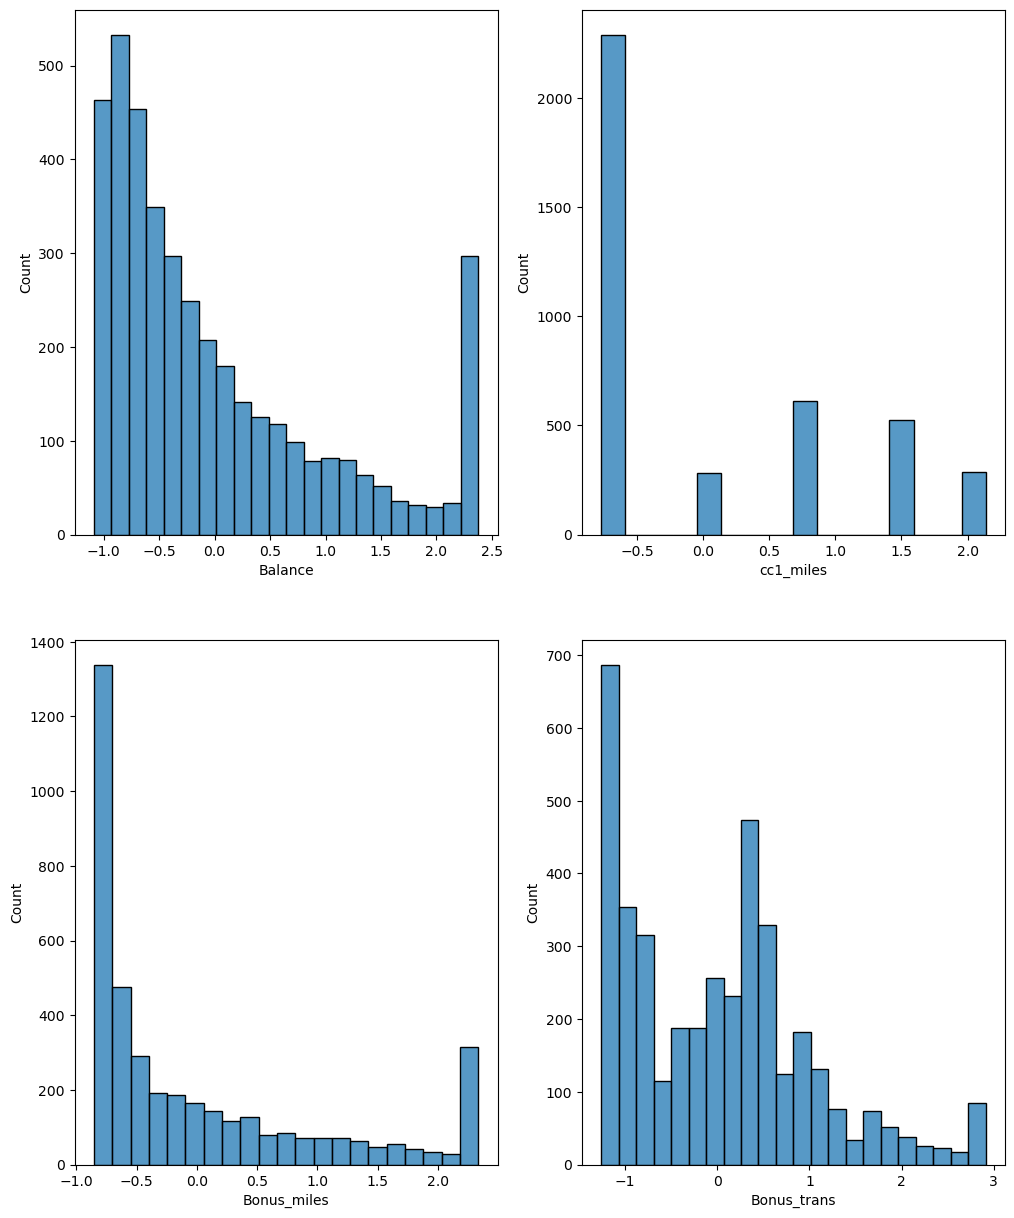

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 15))
sns.histplot(data=df_scaled, x='Balance', ax=axs[0,0])
sns.histplot(data=df_scaled, x='cc1_miles', ax=axs[0,1])
sns.histplot(data=df_scaled, x='Bonus_miles', ax=axs[1,0])
sns.histplot(data=df_scaled, x='Bonus_trans', ax=axs[1,1])
plt.show()

# Implementing Clustering Algorithms:

In [20]:
kmeans=KMeans(n_clusters=2)

In [21]:
cluster=kmeans.fit(df_scaled)

In [22]:
np.unique(cluster.labels_)

array([0, 1])

In [23]:
df_scaled['cluster']=cluster.labels_

In [24]:
df_scaled[df_scaled.cluster==0]

Balance  cc1_miles  Bonus_miles  Bonus_trans  Days_since_enroll  \
4     0.579265   1.409471     1.543191     1.594189           1.363975   
6     0.360434   0.683121     0.667937     1.484467           1.392549   
8     2.377003   0.683121    -0.755720     2.910850           1.370271   
9     0.700425   0.683121     0.720171     1.813633           1.362038   
11    0.558299   2.135821     2.335902     0.826137           1.358648   
...        ...        ...          ...          ...                ...   
3974 -0.091733   0.683121    -0.045911     2.910850          -1.299622   
3979 -0.101858   0.683121     0.307001     0.387250          -1.304950   
3980 -0.594917   0.683121     0.207955     1.813633          -1.304465   
3985 -0.080994   1.409471     1.069874     1.484467          -1.307855   
3991 -0.419774   0.683121    -0.023778     1.813633          -1.312698   

      cluster  
4           0  
6           0  
8           0  
9           0  
11          0  
...       ...  
3974        0  
3979        0  
3980        0  
3985        0  
3991        0  

[1405 rows x 6 columns]

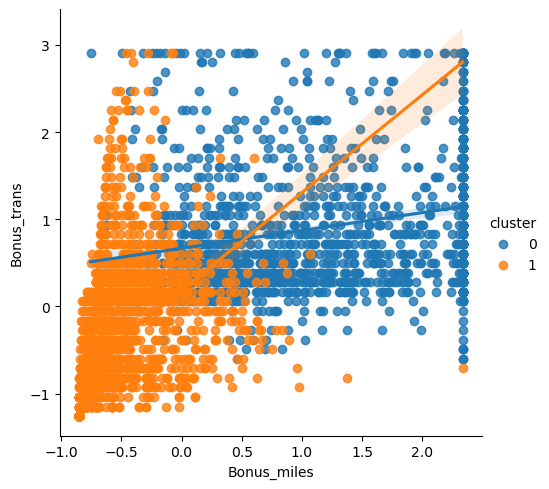

In [25]:
sns.lmplot(data=df_scaled,x='Bonus_miles',y='Bonus_trans',hue='cluster')
plt.show()

In [26]:
cluster.cluster_centers_

array([[ 0.71675264,  1.14553122,  1.09808761,  0.89077075,  0.36111361],
       [-0.3899245 , -0.62318667, -0.59737662, -0.48459305, -0.19645138]])

In [27]:
silhouette_score(df_scaled,cluster.labels_)

0.4258655496145585

In [28]:
inertia=[]

In [29]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

In [30]:
print(inertia)

[20906.370342585647, 11389.329170669507, 9475.977968903722, 8432.27922001485, 7368.930558065332, 6240.916874158501, 5726.184351440113, 5444.40206952475, 4989.495468052147, 4741.381115573748]


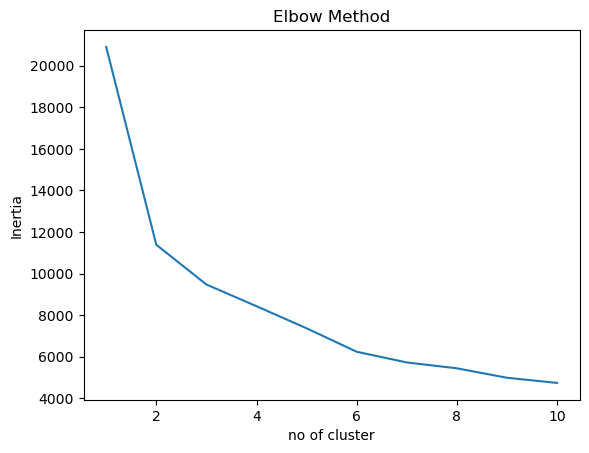

In [31]:
plt.plot(range(1,11),inertia)
plt.xlabel('no of cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [32]:
kmeans=KMeans(n_clusters=3)

In [71]:
kmeans_cluster=kmeans.fit(df_scaled)

In [81]:
df['KMeans_Cluster'] = kmeans_cluster

In [73]:
np.unique(kmeans_cluster.labels_)

array([0, 1, 2])

In [103]:
silhouette_score(df_scaled,kmeans_cluster.labels_)

0.2933164608307636

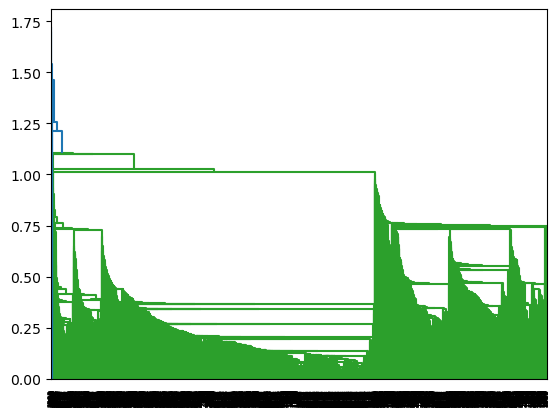

In [105]:
sch.dendrogram(sch.linkage(df_scaled,method='single'))
plt.show()

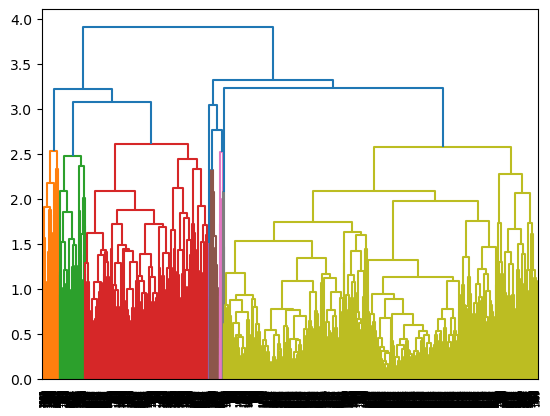

In [37]:
sch.dendrogram(sch.linkage(df_scaled,method='average'))
plt.show()

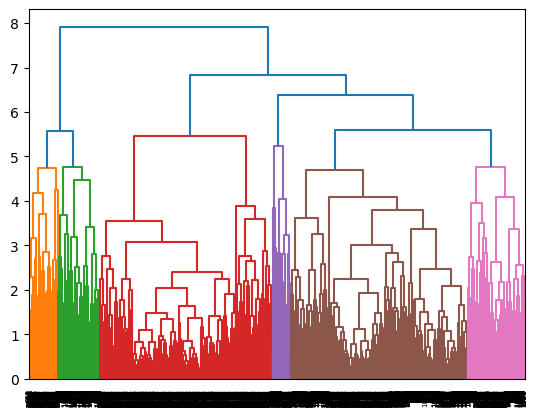

In [47]:
sch.dendrogram(sch.linkage(df_scaled,method='complete'))
plt.show()

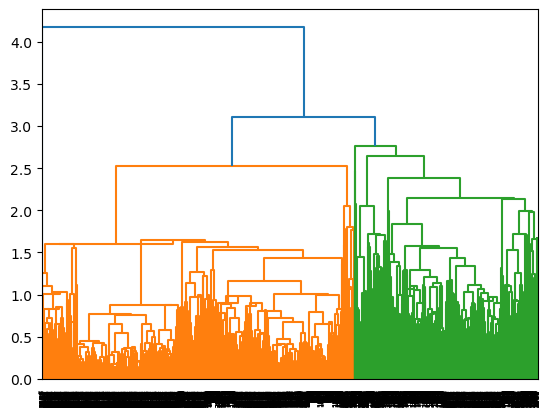

In [39]:
sch.dendrogram(sch.linkage(df_scaled,method='centroid'))
plt.show()

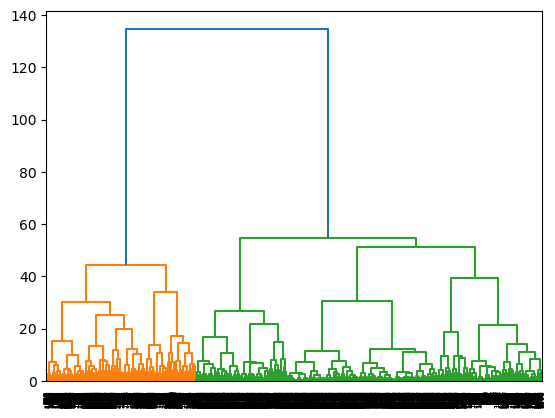

In [40]:
sch.dendrogram(sch.linkage(df_scaled,method='ward'))
plt.show()

In [41]:
agg=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [95]:
hierarchical_labels=agg.fit(df_scaled)

In [97]:
df['Hierarchical_Cluster'] = hierarchical_labels

In [99]:
np.unique(hierarchical_labels.labels_)

array([0, 1], dtype=int64)

In [101]:
silhouette_score(df_scaled,hierarchical_labels.labels_)

0.41809943408813033

In [51]:
eps=np.arange(0.1,0.7,0.1)
min_samples=range(1,11)
output = []
for i in eps:
    for j in min_samples:
        labels=DBSCAN(eps=i,min_samples=j).fit(df_scaled).labels_
        score=silhouette_score(df_scaled,labels)
        output.append([i,j,score])

In [53]:
a=pd.DataFrame(output,columns=['eps','min_samples','silhoutte_score'])

In [55]:
score=a.iloc[:,2].max()

In [57]:
a[a.silhoutte_score==score]

eps  min_samples  silhoutte_score
54  0.6            5         0.050103

In [59]:
labels=DBSCAN(eps=0.6,min_samples=5).fit(df_scaled).labels_

In [61]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

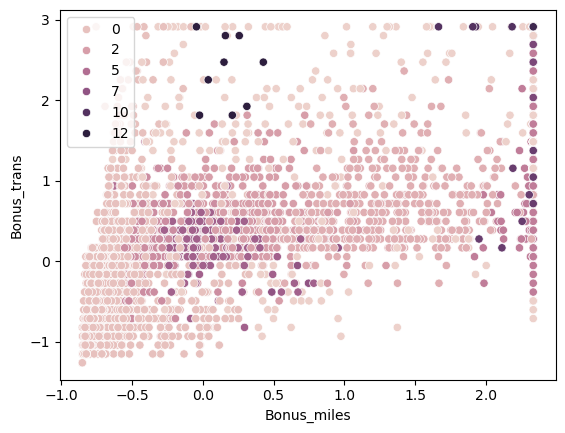

In [63]:
sns.scatterplot(data=df_scaled,x='Bonus_miles',y='Bonus_trans',hue=labels)
plt.show()

In [65]:
import plotly.express as pe

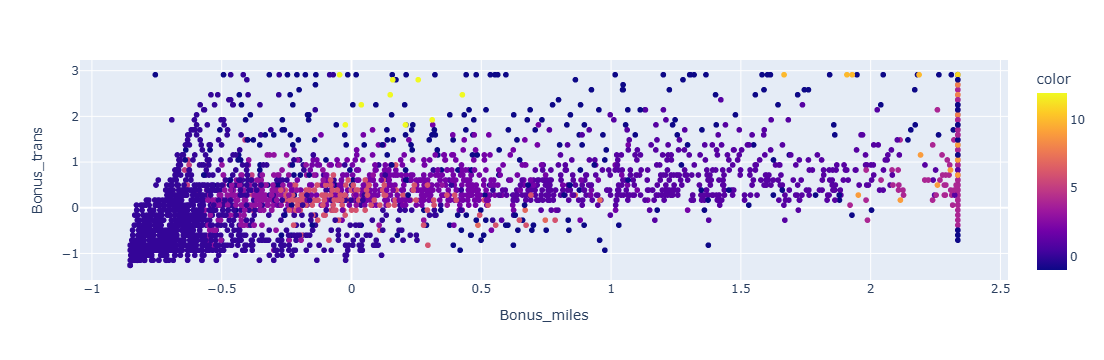

In [66]:
pe.scatter(df_scaled,x='Bonus_miles',y='Bonus_trans',color=labels)


# Cluster Analysis and Interpretation:

In [85]:
optimal_k=4

In [167]:
# Analyze K-Means clusters
print(f"\nK-Means Clustering with K={optimal_k}:")
print(df.groupby('KMeans_Cluster').mean(numeric_only=True))


K-Means Clustering with K=4:
                           Balance  cc1_miles   Bonus_miles  Bonus_trans  \
KMeans_Cluster                                                             
KMeans(n_clusters=3)  63768.635784   2.059515  15410.730683    11.470618   

                      Days_since_enroll  DBSCAN_Cluster  
KMeans_Cluster                                           
KMeans(n_clusters=3)         4118.55939         0.95849  


In [91]:
n_clusters_hierarchical = 3

In [113]:
# Analyze Hierarchical clusters
print(f"\nHierarchical Clustering with {n_clusters_hierarchical} clusters:")
print(df.groupby('Hierarchical_Cluster').mean(numeric_only=True))


Hierarchical Clustering with 3 clusters:
                                Balance  cc1_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster                                                            
AgglomerativeClustering()  63768.635784   2.059515  15410.730683    11.470618   

                           Days_since_enroll  
Hierarchical_Cluster                          
AgglomerativeClustering()         4118.55939  


In [127]:
optimal_eps = 0.5 
optimal_min_samples = 10
df['DBSCAN_Cluster'] = labels

In [129]:
# Analyze DBSCAN clusters
print(f"\nDBSCAN Clustering (eps={optimal_eps}, min_samples={optimal_min_samples}):")
print(df.groupby('DBSCAN_Cluster').mean(numeric_only=True))
print(f"Number of noise points (cluster -1): {np.sum(labels == -1)}")
print(f"Number of actual clusters found: {len(np.unique(labels)) - (1 if -1 in labels else 0)}")


DBSCAN Clustering (eps=0.5, min_samples=10):
                      Balance  cc1_miles   Bonus_miles  Bonus_trans  \
DBSCAN_Cluster                                                        
-1              114289.365559   2.610272  30071.093656    23.770393   
 0               39881.953742   1.000000   3067.200184     5.865473   
 1               94800.201342   4.000000  38817.169463    17.476510   
 2               86162.735480   3.000000  20112.744949    16.292929   
 3               48590.619048   2.000000   8900.400000    13.323810   
 4              137691.926596   5.000000  57253.735106    20.438298   
 5              198748.533333   1.000000   6934.666667    16.800000   
 6               33630.626761   3.000000  15486.915493    13.007042   
 7              196691.050000   1.000000  28863.200000    11.000000   
 8               66341.888889   5.000000  57626.250000    34.333333   
 9               46905.750000   5.000000  56338.145833    18.666667   
 10              73722.600000  

# Visualization:

In [135]:
# Visualize K-Means clusters (using two principal components for 2D visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['KMeans_Cluster'] = kmeans_cluster

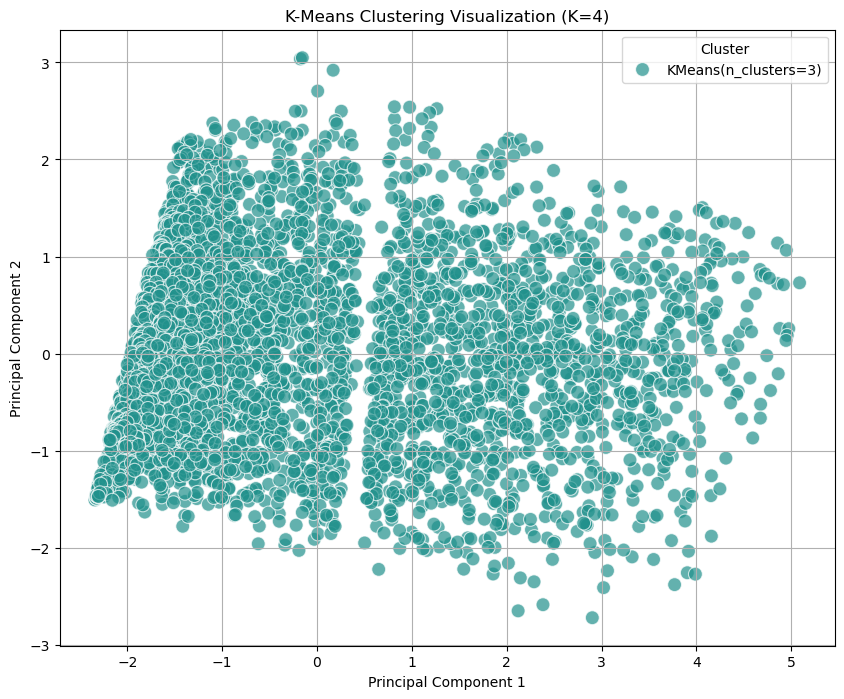

In [137]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title(f'K-Means Clustering Visualization (K={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [139]:
pca_df['Hierarchical_Cluster'] = hierarchical_labels

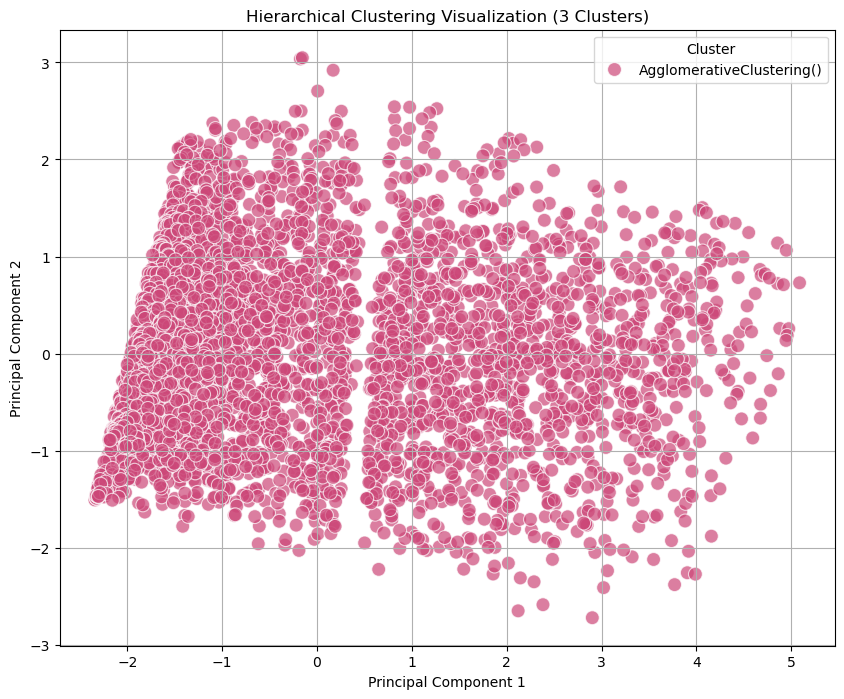

In [141]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=pca_df, palette='plasma', s=100, alpha=0.7)
plt.title(f'Hierarchical Clustering Visualization ({n_clusters_hierarchical} Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [143]:
pca_df['DBSCAN_Cluster'] = labels

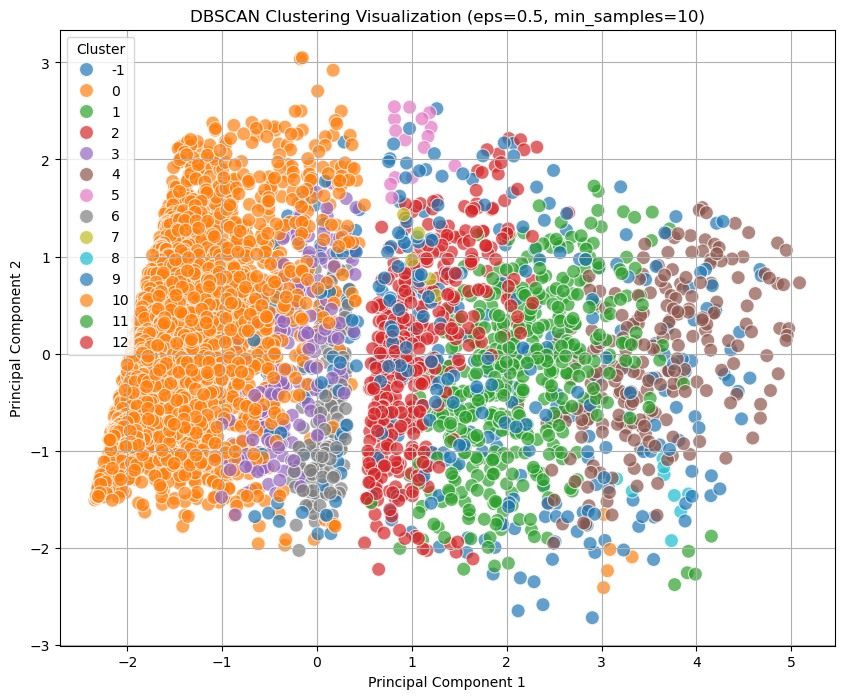

In [145]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='tab10', s=100, alpha=0.7)
plt.title(f'DBSCAN Clustering Visualization (eps={optimal_eps}, min_samples={optimal_min_samples})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Evaluation and Performance Metrics:

In [159]:
# Evaluate K-Means using Silhouette Score
kmeans_silhouette = silhouette_score(df_scaled,kmeans_cluster.labels_)

In [161]:
print(f"K-Means Silhouette Score  {kmeans_silhouette:.4f}")

K-Means Silhouette Score  0.2933


In [163]:
hierarchical_silhouette = silhouette_score(df_scaled,hierarchical_labels.labels_)

In [165]:
print(f" hierarchical Silhouette Score  {hierarchical_silhouette :.4f}")

 hierarchical Silhouette Score  0.4181


In [175]:
if len(np.unique(labels)) > 1 and -1 in labels:
    # Filter out noise points for silhouette score calculation
    core_samples_mask = labels != -1
    dbscan_silhouette = silhouette_score(df_scaled[core_samples_mask], labels[core_samples_mask])
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette:.4f}")
elif len(np.unique(labels)) > 1: # No noise, but multiple clusters
    dbscan_silhouette = silhouette_score(df_scaled, labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
else:
    print("DBSCAN resulted in a single cluster or all noise points, silhouette score not applicable.")

DBSCAN Silhouette Score (excluding noise): 0.0904
